<a href="https://colab.research.google.com/github/Rockydedhia/Python_For_DataScience/blob/master/Assignment_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pd.reset_option('display.min_columns')
import seaborn as sns


In [0]:
y = pd.read_csv(r'/content/playstore-analysis (2) (1).csv')
y.iloc[4453]
y.shape

(10841, 13)

## Task 1##

__Data Clean Up - Missing Value treatment___

__(1.a) Dropping records where Ratting is missing since Rating is our Target or Study Variable__

In [0]:
print("Checking For Missing Values in Rating Column are -",y['Rating'].isnull().sum())

print("Dropping all missing values in Rating Column \n")

y.dropna(subset=['Rating'],inplace=True)

print("After Droping Mising values in Rating column are ",y['Rating'].isnull().sum())

y=y.reset_index(drop=True)     
      
      


Checking For Missing Values in Rating Column are - 1474
Dropping all missing values in Rating Column 

After Droping Mising values in Rating column are  0


In [0]:
print("Checking for Null values in Android ver \n")
c=pd.isnull(y['Android Ver'])
y[c]

Checking for Null values in Android ver 



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
9117,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [0]:
y.shape

(9367, 13)

In [0]:
print("Drop the 3rd records ie record for life made wifi\n")
y.drop([9117],inplace=True)

Drop the 3rd records ie record for life made wifi



In [0]:
c=pd.isnull(y['Android Ver'])
y[c]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [0]:
y.shape

(9366, 13)

In [0]:
y.mode()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,FAMILY,4.4,2,21516.529524,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up


In [0]:
print("Checking for Null values in Android Ver is ",y['Android Ver'].isnull().sum())


Checking for Null values in Android Ver is  2


In [0]:
print("Replacing with mode")
y['Android Ver'].fillna(y['Android Ver'].mode()[0],inplace=True)


Replacing with mode


In [0]:
print("Now there is no Null values now ",y['Android Ver'].isnull().sum())


Now there is no Null values now  0


In [0]:
print("Checking for null values in Current Ver")
c=pd.isnull(y['Current Ver'])
y[c]

Checking for null values in Current Ver


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1473,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5866,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6578,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [0]:
print("Converted nan values into mode of Current Ver")

y['Current Ver'].fillna(y['Current Ver'].mode()[0],inplace=True)



Converted nan values into mode of Current Ver


## 2 Data Clean Up ##



__Which all variables need to be brought to numeric types?__

In [0]:
print(" Review, Installs, Price columns can be Brought to Numeric") 

 Review, Installs, Price columns can be Brought to Numeric


__Price variable – remove $ sign and convert to float__

In [0]:
y['Price'] = y['Price'].str.strip("$")

In [0]:
print("Checking wheter $ Removed ")
y.loc[y['App'] == '[substratum] Vacuum: P']


Checking wheter $ Removed 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up


__c. Installs – remove ‘,’ and ‘+’ sign, convert to integer__


In [0]:
y['Installs'] = y['Installs'].str.replace('\W',"")

In [0]:
print("Checking wheter + , Removed in Installs column")
y.loc[y['App'] == '[substratum] Vacuum: P']

Checking wheter + , Removed in Installs column


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,1000,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up


__Convert all Identified Column to Numeric__



In [0]:
y['Price']=pd.to_numeric(y['Price'],errors='coerce')
y[['Reviews','Size']]=y[['Reviews','Size']].apply(pd.to_numeric,downcast='integer')
print("Converted required columns to Numeric")
y.dtypes




Converted required columns to Numeric


App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

__3 Task__


__Avg rating should be betwwen 1 and 5 as only these values are allowed on the play store__

In [0]:
y=y[y['Rating'].between(1,5)]
print("As there is value between (1,5)\n",y["Rating"])



As there is value between (1,5)
 0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
9362    4.0
9363    4.5
9364    5.0
9365    4.5
9366    4.5
Name: Rating, Length: 9366, dtype: float64


__Reviews Should not be more than installs as only those who installed can review the app__


__i. Are there any such records? Drop if so__

In [0]:
y['Installs']=y['Installs'].apply(pd.to_numeric,downcast='integer')

y=y[y['Reviews']<y['Installs']]
print(y[['App','Reviews','Installs']])


                                                    App  Reviews  Installs
0        Photo Editor & Candy Camera & Grid & ScrapBook      159     10000
1                                   Coloring book moana      967    500000
2     U Launcher Lite – FREE Live Cool Themes, Hide ...    87510   5000000
3                                 Sketch - Draw & Paint   215644  50000000
4                 Pixel Draw - Number Art Coloring Book      967    100000
...                                                 ...      ...       ...
9362                                      FR Calculator        7       500
9363                                   Sya9a Maroc - FR       38      5000
9364                   Fr. Mike Schmitz Audio Teachings        4       100
9365                      The SCP Foundation DB fr nn5n      114      1000
9366      iHoroscope - 2018 Daily Horoscope & Astrology   398307  10000000

[9357 rows x 3 columns]


__4. Identify and handle outliers__

__Price Column__

__i. Make suitable plot to identify outliers in price__


Ploting Boxplot graph for Price column


<function matplotlib.pyplot.show>

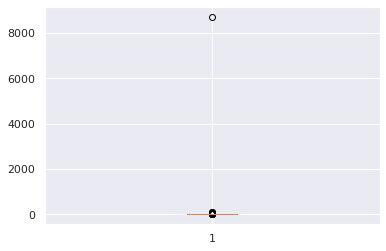

In [0]:
print("Ploting Boxplot graph for Price column")

plt.boxplot(y['Price'].value_counts())
plt.show

__ii. Do you expect apps on the play store to cost $200? Check out these cases__


In [0]:
y=y[y['Price']<200]
print(y['Price'].unique())
print('Now the Price is less than $200')



[ 0.    4.99  3.99  6.99  7.99  5.99  2.99  3.49  1.99  9.99  7.49  0.99
  9.    5.49 10.   24.99 11.99 79.99 16.99 14.99 29.99 12.99  2.49 10.99
  1.5  19.99 15.99 33.99 39.99  3.95  4.49  1.7   8.99  1.49  3.88 17.99
  3.02  1.76  4.84  4.77  1.61  2.5   1.59  6.49  1.29 37.99 18.99  8.49
  1.75 14.    2.    3.08  2.59 19.4   3.9   4.59 15.46  3.04 13.99  4.29
  3.28  4.6   1.    2.95  2.9   1.97  2.56  1.2 ]
Now the Price is less than $200


__After dropping the useless records, make the suitable plot again to identify
outliers__

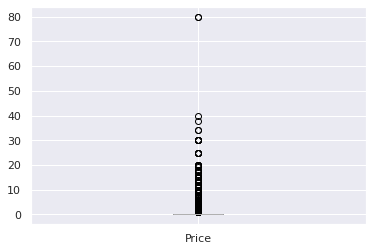

In [0]:
y.boxplot(column="Price")

__iii. After dropping the useless records, make the suitable plot again to identify
outliers__

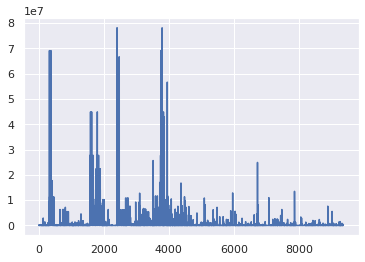

In [0]:
# Make suitable plot

y['Reviews'].plot(kind='line')